#        Predicting Loan  using  Supervised Learning with sklearn


# 1. Import labraries

In [87]:
# import labraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import LabelEncoder , StandardScaler, PolynomialFeatures

from sklearn.linear_model import LogisticRegression # it's a binary classifier { 0 , 1 /accept or not}
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix , classification_report , f1_score

from sklearn.model_selection import train_test_split , learning_curve , GridSearchCV , RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest , f_classif

from sklearn.compose import make_column_transformer



In [2]:
# Read csv file
df = pd.read_csv('home loan/train.csv')

In [3]:
# afficher dataset
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#faire une copie de notre dataset pour l'exploration de données
df1 = df.copy()
# Desplay the first 10 samples 
df1.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# 2. Exploratory data analysis

## 2.1  Analyde de la fomre

In [5]:
# Target
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# Number of  rows and columns
df1.shape

(614, 13)

In [7]:
# Features types
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df1.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

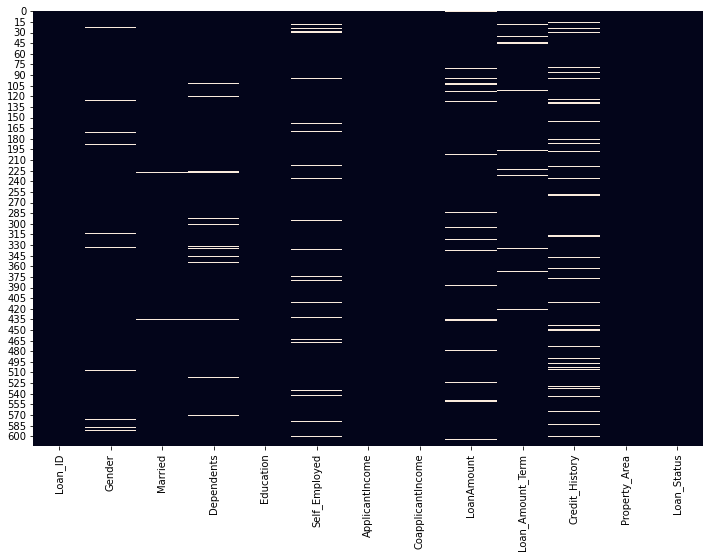

In [9]:
plt.figure(figsize = (12 , 8))
sns.heatmap(df1.isnull() , cbar=False)

In [10]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# NAN value
(df1.isnull().sum() / df1.shape[0] ) .sum()

0.24267100977198697

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [74]:
# on va faire de preprocessing  pour qu'on puisse explorer et nalyser  correctement les données
num_columns = ['ApplicantIncome' ,'CoapplicantIncome','LoanAmount' ]
cat_columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area' , 'Credit_History']

In [20]:
def preprocessing (df1):
    # drop unuseful features like Loan_ID
    df1.drop('Loan_ID' , axis = 1 , inplace =True)
    
    # catégorical features
    df1['Gender'].fillna(df1['Gender'].mode()[0] , inplace =True)
    df1['Married'].fillna(df1['Married'].mode()[0] , inplace =True)
    df1['Dependents'].fillna(df1['Dependents'].mode()[0] , inplace =True)
    df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0] , inplace =True)
    
    # numerical features
    df1['LoanAmount'].fillna(df1['LoanAmount'].median() , inplace =True)
    df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].median(), inplace =True)
    df1['Credit_History'].fillna(df1['Credit_History'].mode()[0] , inplace =True)
    
    return df
    
    
    

In [15]:
df1 = preprocessing(df1)
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [16]:
df1.isnull().sum().sum()

0

### Analyse de forme 
      -Target : Loan_Status
      -Number of  rows and columns:  (614, 13) 
      -Features types:  float64(4), int64(1), object(8)
      -Analyse des valeurs manquantes (NaN): 149 valeurs NaN --> 0.24% , credit_History : 50 valeurs NaN ->0.081%
      
                                        

## 2.2 Analyde de fond

### 2.2.1 Target

In [51]:
df1['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [54]:
df1['Loan_Status'].value_counts(normalize =True) *100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

<AxesSubplot:ylabel='Loan_Status'>

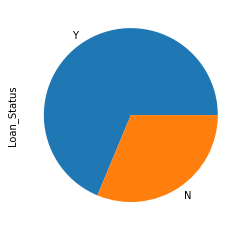

In [58]:
df1['Loan_Status'].value_counts().plot.pie()

### 2.2.2 Numerical features

In [21]:
df[num_columns].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


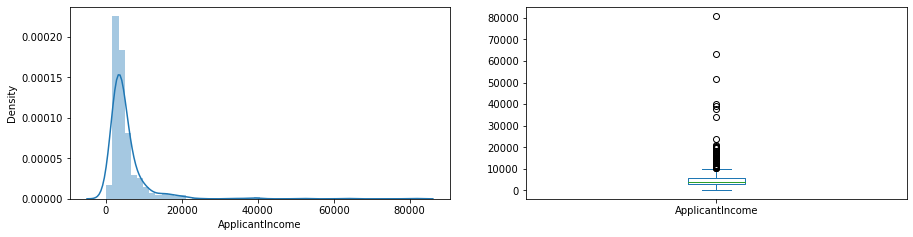

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


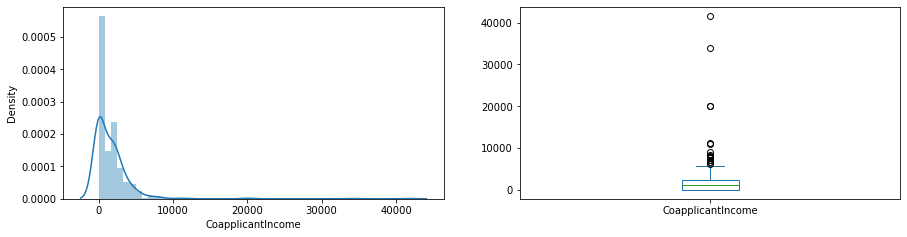

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


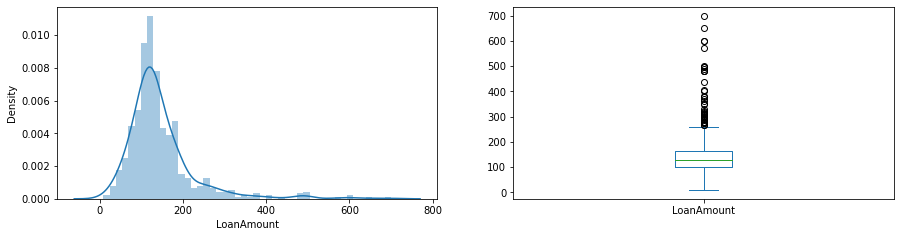

In [42]:
# Histograme des variables continues:
i = 1
for col in num_columns:
    plt.figure(figsize=(15,12))
    plt.subplot(3,2,i)
    sns.distplot(df1[col])
    i = i+1 
    plt.subplot(3,2,i)
    df1[col].plot.box()
    i = i+1
    plt.show()
    
   

### 2.2.3 Categorical features

<AxesSubplot:ylabel='Gender'>

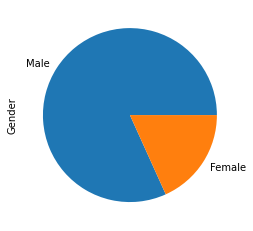

In [47]:
# categorical variable
df1['Gender'].value_counts().plot.pie()

<AxesSubplot:>

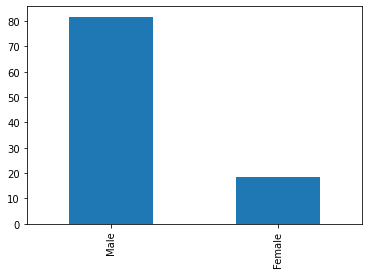

In [49]:
(df1['Gender'].value_counts(normalize = True) *100).plot.bar('taux sex')

In [56]:
df1['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [58]:
df1['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [59]:
df1['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [63]:
for col in df1.select_dtypes('object'):
  print(f'{col :-<50} ,{df1[col].unique()}')
    

Gender-------------------------------------------- ,['Male' 'Female']
Married------------------------------------------- ,['No' 'Yes']
Dependents---------------------------------------- ,['0' '1' '2' '3+']
Education----------------------------------------- ,['Graduate' 'Not Graduate']
Self_Employed------------------------------------- ,['No' 'Yes']
Property_Area------------------------------------- ,['Urban' 'Rural' 'Semiurban']
Loan_Status--------------------------------------- ,['Y' 'N']


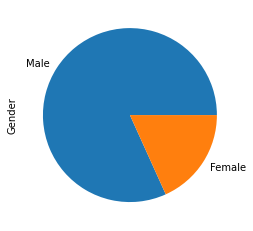

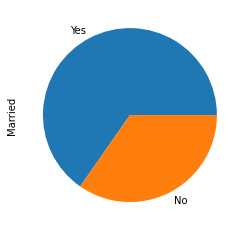

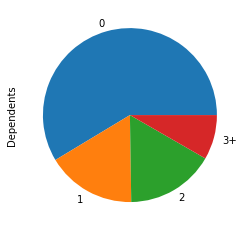

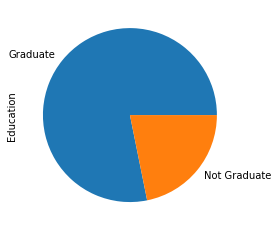

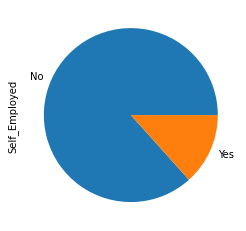

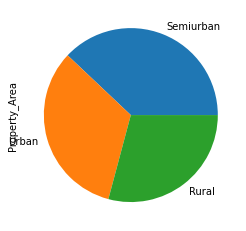

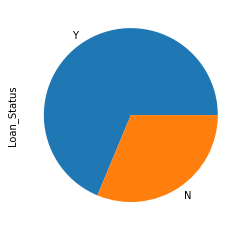

In [65]:
for col in df1.select_dtypes('object'):
    plt.figure()
    df1[col].value_counts().plot.pie()

### 2.2.4 Categorical feature /Target

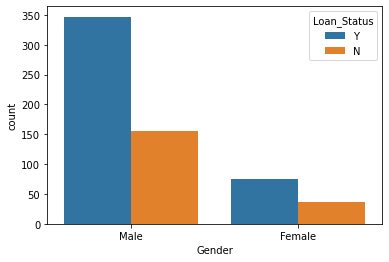

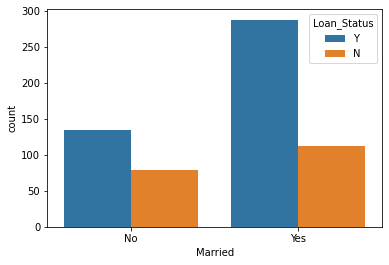

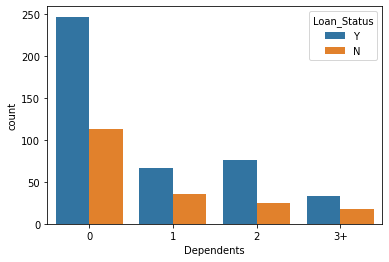

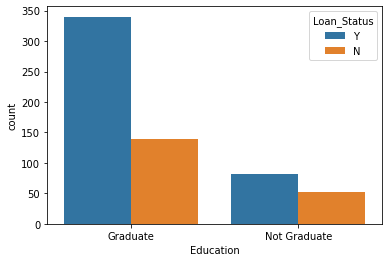

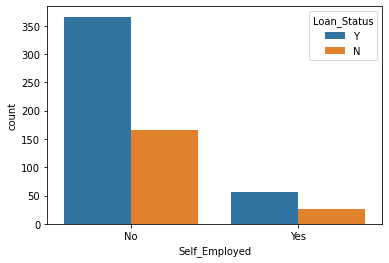

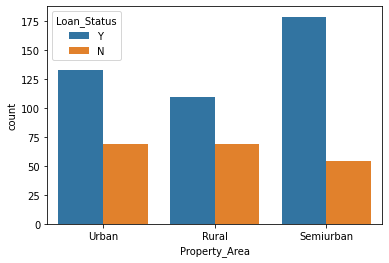

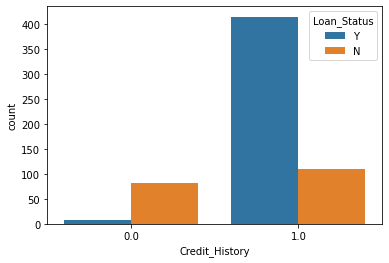

In [75]:
# - Relation categorical feature /Target
for col in cat_columns:
    plt.figure()
    sns.countplot(x = col  , hue ='Loan_Status' , data =df1 )

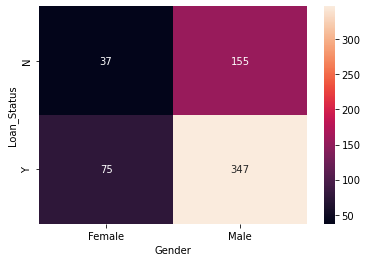

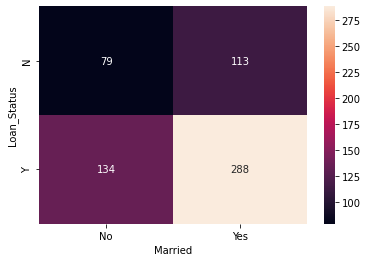

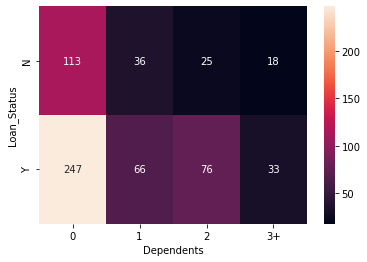

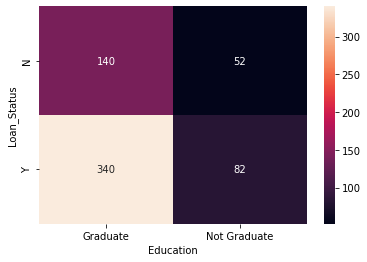

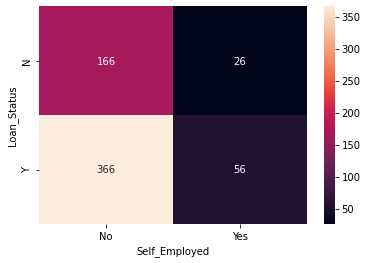

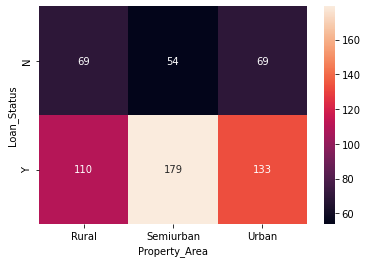

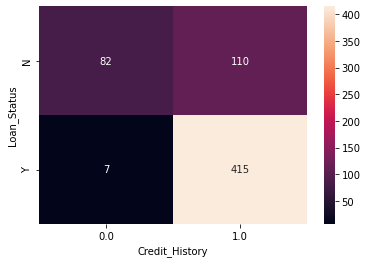

In [81]:
for col in cat_columns:
    plt.figure()
    sns.heatmap(pd.crosstab(df1['Loan_Status'] , df1[col]) ,annot = True , fmt='d')


In [89]:
df1['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

### Analyse de fond

-  Visualisation de la target 

       422 Yes --> 68.72%
       192 No --> 31.27 %
       
-  Compréhension des variables

       -loanAmount : 
       -loan_amount _Term :  nombre de mois pour rembourser le pret   
       -property_Area : ou il habite 
       -ApplicantIncome : salaire 	
       -CoapplicantIncome	: salaire de conjoint
                                      
- Signification des variables 

       -Des variables continues : 'ApplicantIncome' ,'CoapplicantIncome','LoanAmount' (non standardisées)
       
       -Des variables qualitatives binaire: gender (male > female), Educated >not educated , not self employed > self_employed 
                                    
       -Des variables non binaire(3 valeurs):Property_Area
                                    
- Relation categorical feature /Target

        -Lorsque vous etes female vous aurez 50 que votre credit sera rejeté  
        -Lorsque vous etes Self employed vous aurez plus de chance que votre credit sera accepté 
        -Lorsque vous etes Graduated vous aurez plus de chance que votre credit sera accepté 
        -Lorsque vous n'avez pas d'history de credit vous avez beaucaup de chance que votre credit sera rejeté. 
           
- Outliers

        -Beaucaup des outliers  
        
        

## 2.3 Analyse plus détaillé

<Figure size 1080x864 with 0 Axes>

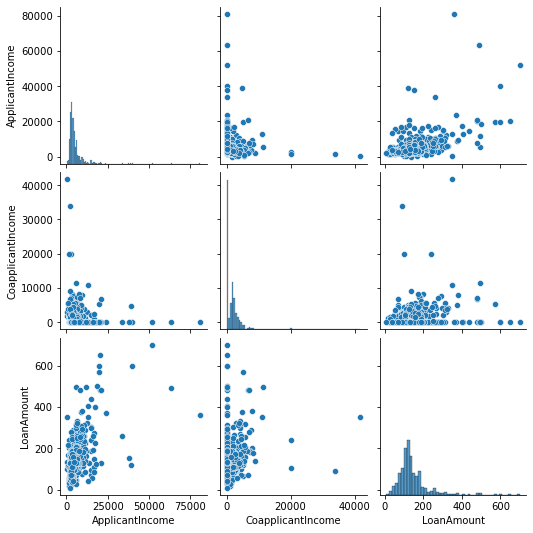

In [92]:
plt.figure(figsize = (15,12))
sns.pairplot(df1[num_columns])

<AxesSubplot:>

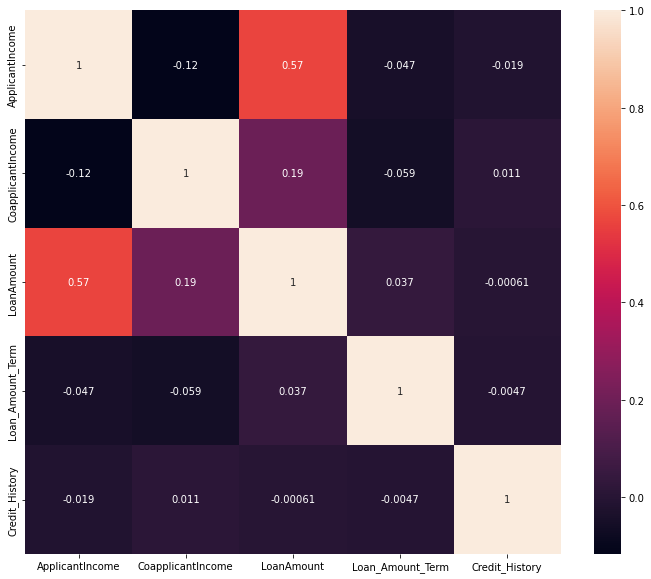

In [94]:
plt.figure(figsize = (12,10))
sns.heatmap(df1.corr() , annot = True)

### Analyse plus détaillé 
      
      - Forte corrélation entre loanAmount et ApplicantIncome(0.57) , loamAmount et  CoapplicantIncome (0.19)
       

# 2. Preprocessing

In [3]:
# faire une copie pour le preprocessing
data = df.copy()
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# split the dataset into trainset and testset
trainset , testset = train_test_split(data , random_state = 0 , test_size = 0.2)
print('Dataset size  -> ', data.shape[0])
print('Trainset size ->' , trainset.shape[0])
print('Testset size  -> ' , testset.shape[0])

Dataset size  ->  614
Trainset size -> 491
Testset size  ->  123


In [5]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [6]:
trainset['Loan_Status'].value_counts()

Y    332
N    159
Name: Loan_Status, dtype: int64

In [7]:
testset['Loan_Status'].value_counts()

Y    90
N    33
Name: Loan_Status, dtype: int64

In [8]:
def encoding(df):
    # dictionnaire de code
    code={'Male':1,
          'Female':0,
          'Yes':1,
          'No':0,
          'Y':1,
          'N':0,
          'Graduate':1,
          'Not Graduate':0,
          'Urban':0,
          'Rural':1,
          'Semiurban':2,
          '0':0,
          '1':1,
          '2':2,
          '3+':3

    }

    for col in df.select_dtypes('object'):
        df[col]= df[col].map(code)
        
    return df

In [9]:
def imputation (df):
    
    # catégorical features
    df['Gender'].fillna(df['Gender'].mode()[0] , inplace =True)
    df['Married'].fillna(df['Married'].mode()[0] , inplace =True)
    df['Dependents'].fillna(df['Dependents'].mode()[0] , inplace =True)
    df['Self_Employed'].fillna(df['Self_Employed'].mode()[0] , inplace =True)
    df['Credit_History'].fillna(df['Credit_History'].mode()[0] , inplace =True)

    
    # numerical features
    df['LoanAmount'].fillna(df['LoanAmount'].median() , inplace =True)
    df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace =True)
    
     # drop unuseful features like Loan_ID
    df =  df.drop('Loan_ID' , axis = 1)
    
    return df

In [10]:
def preprocessing(df):
    df = encoding(df)
    df= imputation(df)
    x =df.drop('Loan_Status' , axis = 1)
    y = df['Loan_Status']

    return x , y


In [11]:
x_train , y_train = preprocessing(trainset)
x_test , y_test = preprocessing(testset)

# 4. Supervised Learning Model

## 4.1 Pipelines

In [12]:
preprocessor = make_pipeline(StandardScaler() , SelectKBest(f_classif , k=6))

In [13]:
# Estimators
logreg = make_pipeline(preprocessor , LogisticRegression(random_state = 0))
knn = make_pipeline(preprocessor , KNeighborsClassifier())
svm = make_pipeline(preprocessor , SVC(random_state =0))
random_forest = make_pipeline(preprocessor , RandomForestClassifier(random_state = 0))

In [14]:
#Dictionary of estimators
models = { 'RandomForest' :random_forest,
           'KNN':knn,
           'SVM' : svm,
           'LogisticRegression' : logreg
    
} 

## 4.2 Evaluation

In [41]:
def evaluation(models):
    # training
    for name ,model in models.items():
        print(name)
        model.fit(x_train , y_train)

        # Testing
        y_pred = model.predict(x_test)
        #  confusion matrix & classification report
        print(confusion_matrix(y_test , y_pred))
        print(classification_report(y_test , y_pred ))

        # Learning curve 
        n , train_scores  , val_scores = learning_curve (model , x_train , y_train , cv = 5 , scoring ='f1' ,
                                                         train_sizes= np.linspace(0.1 , 1 , 10))
        #print(train_scores.shape , val_scores.shape)
        
        # Plot
        
        # figure size
        plt.figure(figsize=(8, 6))
        plt.plot(n , train_scores.mean(axis = 1), label='Train_curve')
        plt.plot(n , val_scores.mean(axis=1), label ='Validation_curve')         
        # set the x-axis label         
        plt.xlabel('data size')
        # set the y-axis label         
        plt.ylabel('Score')
        # set the plot title         
        plt.title('Learning Curve')              
        plt.legend()
        # display the plot         
        plt.show()

RandomForest
[[16 17]
 [11 79]]
              precision    recall  f1-score   support

           0       0.59      0.48      0.53        33
           1       0.82      0.88      0.85        90

    accuracy                           0.77       123
   macro avg       0.71      0.68      0.69       123
weighted avg       0.76      0.77      0.76       123



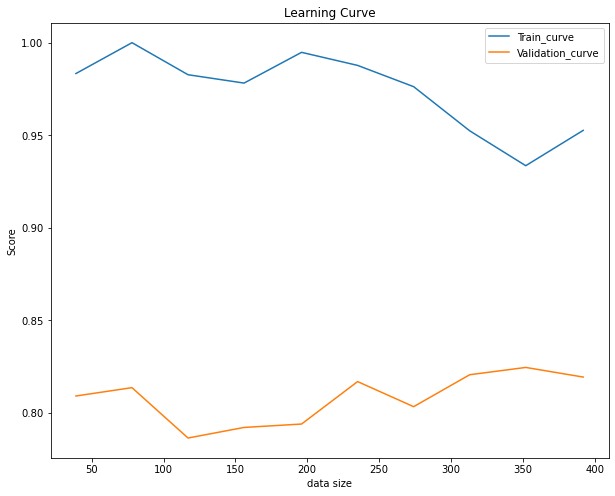

KNN
[[15 18]
 [ 8 82]]
              precision    recall  f1-score   support

           0       0.65      0.45      0.54        33
           1       0.82      0.91      0.86        90

    accuracy                           0.79       123
   macro avg       0.74      0.68      0.70       123
weighted avg       0.77      0.79      0.78       123



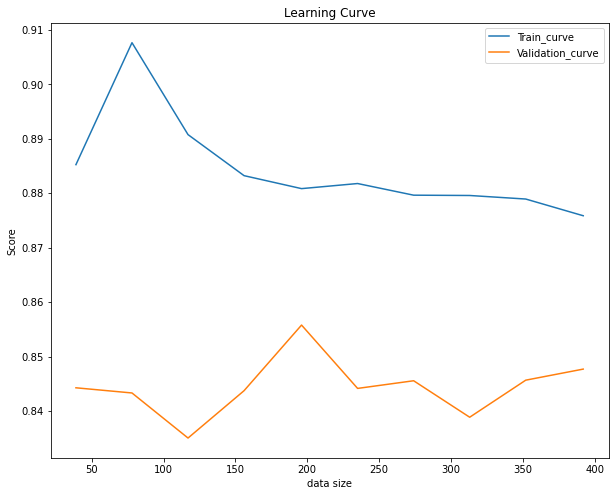

SVM
[[15 18]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



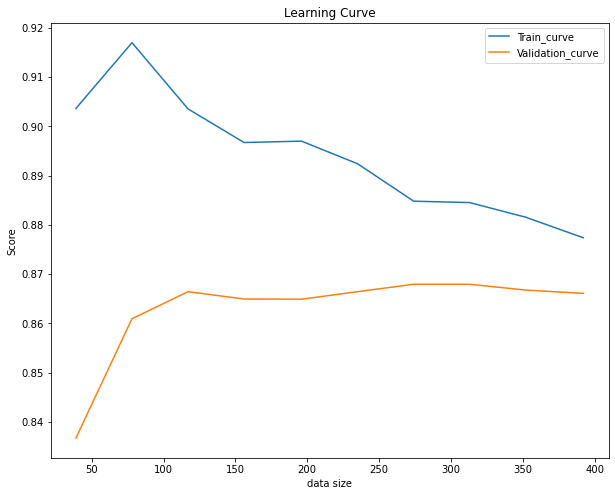

LogisticRegression
[[15 18]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



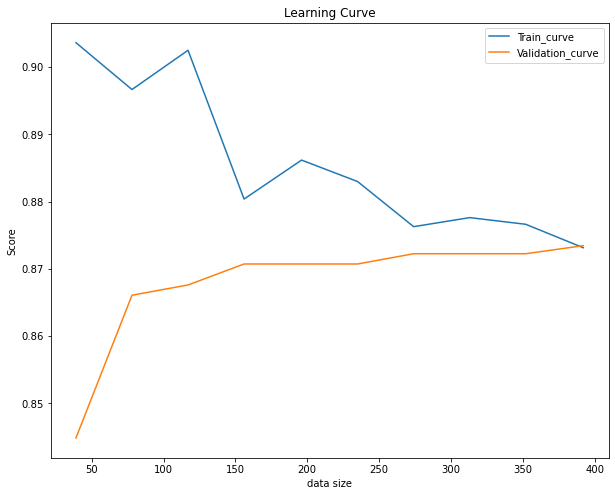

In [42]:
evaluation(models)

 
 Remarques:
 
 - Les deux SVM et logistic regression ont fait du bon travail. 
 -  On va choisir le logistic regression pour l'optimiser mais vous pouvez de votre côté  optimiser le SVM je pense qu'il va vous donner  un bon résultat.

## 4.3 Optimisation

In [73]:
hyper_params = {'pipeline__selectkbest__k': range(4 , 12),
               'logisticregression__penalty':['l1','l2' ,'elasticnet'],
               'logisticregression__C':[1,10,100,1000]
               }

In [74]:
grid = RandomizedSearchCV(logreg , hyper_params , scoring='recall' , cv= 4)
grid.fit(x_train , y_train)
grid.best_params_


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self

{'pipeline__selectkbest__k': 7,
 'logisticregression__penalty': 'l2',
 'logisticregression__C': 1}

LogisticRegression
[[15 18]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



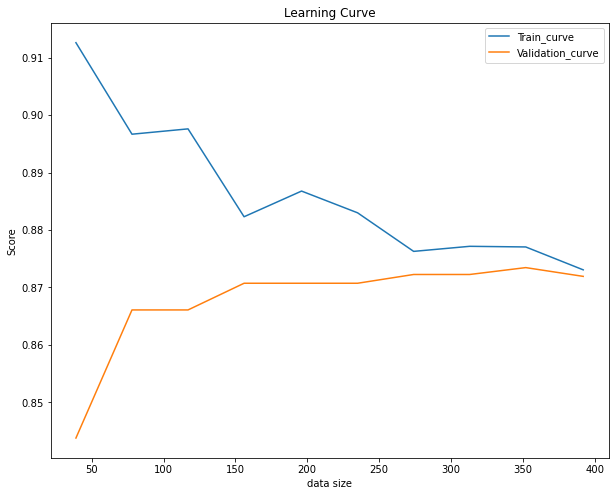

In [75]:
best_models = {'LogisticRegression' :grid.best_estimator_} 
evaluation (best_models)

In [161]:
# new prediction
best_models['LogisticRegression'].predict([[1,0,0,0,0,1720,0,700,360.0,0,1]])

C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [163]:
# new prediction probability
best_models['LogisticRegression'].predict_proba([[1,0,0,0,0,1720,0,700,360.0,0,1]])

C:\Users\dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.97596105, 0.02403895]])

# 5. Save the model

In [164]:
# Save the model using pickle package
model =best_models['LogisticRegression']
pickle.dump(model , open('loan_predict.pkl' , 'wb'))

This model can be used on any new customer to provide some insight when deciding whether to grant the loan.

Now let's build a streamlit application that can be used by any new customer to see if his loan  will be approved or not.

                                                    THE END 